In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn
!pip install openpyxl xlrd


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [3]:
import pandas as pd

# Load datasets with specified encoding
customer_data = pd.read_csv(r"D:\PROJECTS\EDA\DATA'S\Customers.csv",encoding='ISO-8859-1')
data_dictionary_df = pd.read_csv(r"D:\PROJECTS\EDA\DATA'S\Data_Dictionary.csv", encoding='ISO-8859-1')
exchange_rates_df = pd.read_csv(r"D:\PROJECTS\EDA\DATA'S\Exchange_Rates.csv", encoding='ISO-8859-1')
products_df = pd.read_csv(r"D:\PROJECTS\EDA\DATA'S\Products.csv", encoding='ISO-8859-1')
sales_df = pd.read_csv(r"D:\PROJECTS\EDA\DATA'S\Sales.csv", encoding='ISO-8859-1')
stores_df = pd.read_csv(r"D:\PROJECTS\EDA\DATA'S\Stores.csv", encoding='ISO-8859-1')

# Display the first few rows of each DataFrame to check
print(customer_data.head())
print(data_dictionary_df.head())
print(exchange_rates_df.head())
print(products_df.head())
print(sales_df.head())
print(stores_df.head())


   CustomerKey  Gender               Name            City State Code  \
0          301  Female      Lilly Harding  WANDEARAH EAST         SA   
1          325  Female       Madison Hull      MOUNT BUDD         WA   
2          554  Female      Claire Ferres       WINJALLOK        VIC   
3          786    Male  Jai Poltpalingada    MIDDLE RIVER         SA   
4         1042    Male    Aidan Pankhurst   TAWONGA SOUTH        VIC   

               State Zip Code    Country  Continent    Birthday  
0    South Australia     5523  Australia  Australia    7/3/1939  
1  Western Australia     6522  Australia  Australia   9/27/1979  
2           Victoria     3380  Australia  Australia   5/26/1947  
3    South Australia     5223  Australia  Australia   9/17/1957  
4           Victoria     3698  Australia  Australia  11/19/1965  
   Table          Field                                        Description
0  Sales   Order Number                           Unique ID for each order
1  Sales      Line It

In [4]:
# Check for missing values
print("Missing values in each column:")
print(customer_data.isnull().sum())

Missing values in each column:
CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64


In [5]:
            # HANDLING MISSING VALUES
# Calculate the mode for 'State Code'
most_common_state_code = customer_data['State Code'].mode()[0]

# Fill missing values with the mode by assigning directly
customer_data['State Code'] = customer_data['State Code'].fillna(most_common_state_code)

# Verify that there are no more missing values
print("Missing values after imputation:")
print(customer_data.isnull().sum())


Missing values after imputation:
CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64


In [6]:
# Check data types of each column
print(customer_data.dtypes)


CustomerKey     int64
Gender         object
Name           object
City           object
State Code     object
State          object
Zip Code       object
Country        object
Continent      object
Birthday       object
dtype: object


In [7]:
# Convert 'Birthday' to datetime and calculate 'Age'
customer_data['Birthday'] = pd.to_datetime(customer_data['Birthday'], errors='coerce')
customer_data['Age'] = (pd.to_datetime('today') - customer_data['Birthday']).dt.days // 365
print(customer_data.dtypes)

CustomerKey             int64
Gender                 object
Name                   object
City                   object
State Code             object
State                  object
Zip Code               object
Country                object
Continent              object
Birthday       datetime64[ns]
Age                     int64
dtype: object


In [8]:
            # Demographic Distribution
# Gender distribution
gender_distribution = customer_data['Gender'].value_counts()
print("Gender Distribution:")
print(gender_distribution)


Gender Distribution:
Gender
Male      7748
Female    7518
Name: count, dtype: int64


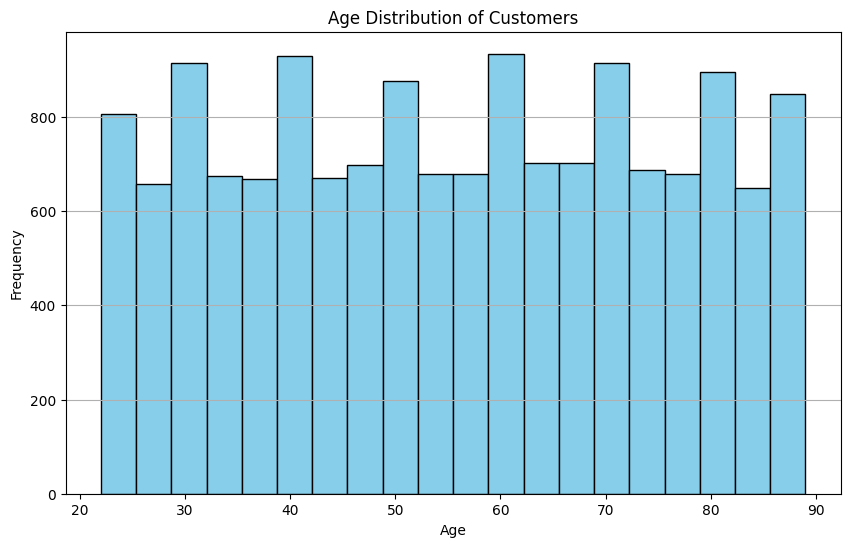

In [9]:
# Age Distribution
import matplotlib.pyplot as plt

# Age distribution
plt.figure(figsize=(10, 6))
plt.hist(customer_data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


In [10]:
#  Location Distribution
# State distribution
state_distribution = customer_data['State'].value_counts()
print("State Distribution:")
print(state_distribution)

# Country distribution
country_distribution = customer_data['Country'].value_counts()
print("Country Distribution:")
print(country_distribution)


State Distribution:
State
California         715
Ontario            644
Texas              522
New South Wales    430
New York           423
                  ... 
Dacorum              1
Purbeck              1
Crotone              1
Viterbo              1
New Brunswick        1
Name: count, Length: 512, dtype: int64
Country Distribution:
Country
United States     6828
United Kingdom    1944
Canada            1553
Germany           1473
Australia         1420
Netherlands        733
France             670
Italy              645
Name: count, dtype: int64


In [11]:
# Merge sales data with customer data to create merged_df
merged_df = sales_df.merge(customer_data[['CustomerKey', 'Gender', 'Birthday', 'Age']], on='CustomerKey', how='left')
print(merged_df)

       Order Number  Line Item Order Date Delivery Date  CustomerKey  \
0            366000          1   1/1/2016           NaN       265598   
1            366001          1   1/1/2016     1/13/2016      1269051   
2            366001          2   1/1/2016     1/13/2016      1269051   
3            366002          1   1/1/2016     1/12/2016       266019   
4            366002          2   1/1/2016     1/12/2016       266019   
...             ...        ...        ...           ...          ...   
62879       2243030          1  2/20/2021           NaN      1216913   
62880       2243031          1  2/20/2021     2/24/2021       511229   
62881       2243032          1  2/20/2021     2/23/2021       331277   
62882       2243032          2  2/20/2021     2/23/2021       331277   
62883       2243032          3  2/20/2021     2/23/2021       331277   

       StoreKey  ProductKey  Quantity Currency Code  Gender   Birthday  Age  
0            10        1304         1           CAD    Ma

In [12]:
# Convert 'Order Date' to datetime
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'])

# Calculate Total Sales and Number of Orders per Customer
purchase_summary = merged_df.groupby('CustomerKey').agg(
    Total_Sales=('Quantity', 'sum'),
    Number_of_Orders=('Order Number', 'nunique')
).reset_index()


In [13]:
# Calculate Average Order Value (AOV)
purchase_summary['Average_Order_Value'] = purchase_summary['Total_Sales'] / purchase_summary['Number_of_Orders']

# Define segments based on Average Order Value
def segment_customers(row):
    if row['Average_Order_Value'] < 10:
        return 'Low Value'
    elif row['Average_Order_Value'] < 20:
        return 'Medium Value'
    else:
        return 'High Value'

# Apply the segmentation function
purchase_summary['Customer_Segment'] = purchase_summary.apply(segment_customers, axis=1)

# Display the segmented customer summary
print(purchase_summary[['CustomerKey', 'Total_Sales', 'Number_of_Orders', 'Average_Order_Value', 'Customer_Segment']].head())

   CustomerKey  Total_Sales  Number_of_Orders  Average_Order_Value  \
0          301            2                 1                  2.0   
1          325           27                 3                  9.0   
2          554           14                 2                  7.0   
3         1042            6                 1                  6.0   
4         1314           13                 1                 13.0   

  Customer_Segment  
0        Low Value  
1        Low Value  
2        Low Value  
3        Low Value  
4     Medium Value  


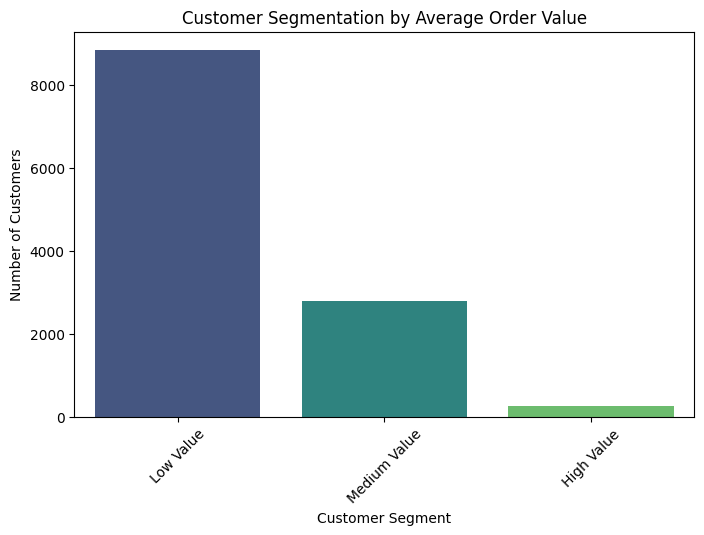

In [14]:
# Bar plot for customer segments
plt.figure(figsize=(8, 5))
segment_counts = purchase_summary['Customer_Segment'].value_counts()
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis', hue=None)
plt.title('Customer Segmentation by Average Order Value')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


In [15]:
# Merge Age information back into purchase_summary
purchase_summary = purchase_summary.merge(merged_df[['CustomerKey', 'Age']], on='CustomerKey', how='left')

# Calculate average age by customer segment
average_age_by_segment = purchase_summary.groupby('Customer_Segment')['Age'].mean().reset_index()

# Display average age by segment
print(average_age_by_segment)
#Completed Customer Analysis

  Customer_Segment        Age
0       High Value  54.037770
1        Low Value  55.448799
2     Medium Value  55.354052


In [16]:
# Define the file path
output_path = r"D:\PROJECTS\EDA\Cleanned Data\customer_analysis.csv"

# Save the purchase_summary DataFrame to an Excel file
purchase_summary.to_csv(output_path, index=False)


In [18]:
pip install pandas sqlalchemy pymysql


Note: you may need to restart the kernel to use updated packages.


In [20]:
from sqlalchemy import create_engine

# Database connection details
user = 'root'
password = 'Krishna3_6_9'
host = '127.0.0.1'
database = 'Datas'

# Create a database connection
connection_string = f'mysql+pymysql://{user}:{password}@{host}/{database}'
engine = create_engine(connection_string)

# Store the purchase_summary DataFrame to the database
purchase_summary.to_sql('Customer_analysis', con=engine, index=False, if_exists='replace')

print("Data successfully stored in the MySQL database.")


Data successfully stored in the MySQL database.


In [21]:
purchase_summary.dtypes

CustomerKey              int64
Total_Sales              int64
Number_of_Orders         int64
Average_Order_Value    float64
Customer_Segment        object
Age                      int64
dtype: object